# Enunciado Parte 1

Imágenes en `white_patch` y `coord_cromaticas`

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/EIA-UBA/Bimestre3/VC1/TP1/Parte1

/content/drive/MyDrive/EIA-UBA/Bimestre3/VC1/TP1/Parte1


In [3]:
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# Herramienta para navegar en el contenido de carpetas
import os

# Coordenadas cromáticas

In [4]:
def load_figure(figure_name):
  """
  Función load_figure(figure_name):

  Permite cargar una imagen BGR y convertirla a RGB.
  - Argumentos de entrada: 
      figure_name (string): path de la imagen de entrada.
  - Argumentos de salida:
      imgRGB (Numpy array): Imagen transformada en escala RGB. Arreglo de m x n pixeles, donde m es el numero de pixeles en dirección vertical,
      n es el número de pixeles en dirección horizontal, y k es el número de canales de la imagen
  """
  # Cargo imagen original
  img = cv.imread(figure_name)

  # Cambio a RGB
  imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

  return img, imgRGB

In [35]:
def coord_cromaticas(input_image:np.ndarray):
  """
  Función coord_cromaticas(input_image):

  Función que permite obtener las coordenadas cromaticas de una imagen en RGB.
  - Argumentos de entrada: 
      input_image: imagen de entrada en escala RGB. Numpy array de m x n pixeles, donde m es el numero de pixeles en dirección vertical,
      n es el número de pixeles en dirección horizontal, y k es el número de canales de la imagen
  - Argumentos de salida:
      img_new: Imagen transformada a coordenadas cromáticas. Numpy array de m x n pixeles y k canales.
  """
  # Separo canales RGB de imagen de entrada en 3 arrays 2d
  im_r, im_g, im_b = cv.split(input_image)

  # Sumo los canales, previo casteo a 'uint16' para que la suma esté dentro del rango válido
  sum_imgRGB = im_r.astype('uint16') + im_g.astype('uint16') + im_b.astype('uint16')  #Array 2d, uint16 [0, 65535]

  # Encuentro los indices donde la suma anterior sea distinta de cero
  mask = np.where(sum_imgRGB != 0)

  # Divido cada canal por la suma de los tres canales, forzando que en los indices donde sum_imgRGB sea cero el resultado sea cero
  img_new = np.zeros(input_image.shape)
  img_new[mask[0], mask[1], 0] = im_r[mask[0], mask[1]]/sum_imgRGB[mask[0], mask[1]]
  img_new[mask[0], mask[1], 1] = im_g[mask[0], mask[1]]/sum_imgRGB[mask[0], mask[1]]
  img_new[mask[0], mask[1], 2] = im_b[mask[0], mask[1]]/sum_imgRGB[mask[0], mask[1]]

  # Dado que los coeficientes devuelven valores entre 0 y 1, es necesario multiplicarlos por 255 y luego castearlos a 'uint8'
  img_new = (img_new*255).astype('uint8')

  return img_new

In [33]:
# Cargo imagenes
directory = './coord_cromaticas/'
fileNames = os.listdir(directory)

./coord_cromaticas/CoordCrom_1.png
./coord_cromaticas/CoordCrom_3.png
./coord_cromaticas/CoordCrom_2.png


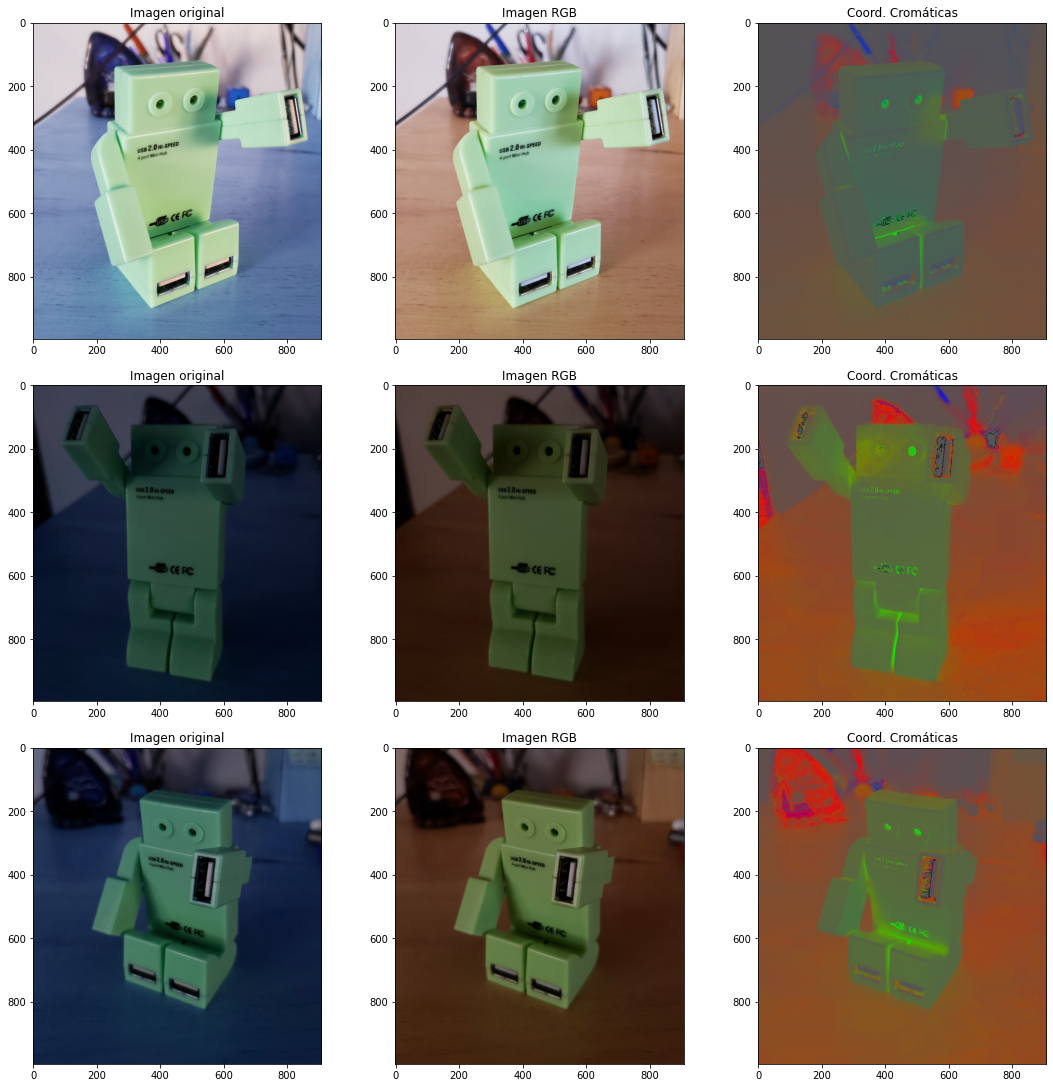

In [36]:
fig, axs = plt.subplots(len(fileNames), 3, constrained_layout=True, figsize=(15,15))
for i in range(len(fileNames)):
  figurePath = directory+fileNames[i]
  print(figurePath)
  img, imgRGB = load_figure(figurePath)
  imgCC = coord_cromaticas(imgRGB)
  axs[i, 0].imshow(img)
  axs[i, 0].set_title('Imagen original')
  axs[i, 1].imshow(imgRGB)
  axs[i, 1].set_title('Imagen RGB')
  axs[i, 2].imshow(imgCC)
  axs[i, 2].set_title('Coord. Cromáticas')

## Conclusión

El método permite segmentar la imagen independientemente de los cambios de contaste. De hecho, el desempeño fue aún mejor en aquellos casos donde la iluminación fue mas escasa. 

Este algoritmo presenta un inconveniente cuando hay píxeles en color RGB negro (0,0,0) dado que, en esos casos, la suma de los tres canales es cero tambien. Es por ello que se aplicó una lógica donde, en aquellas ubicaciones donde se cumplía tal condición, se asignó el valor cero.

---


# White patch

In [37]:
def white_patch(input_image:np.ndarray):
  """
  Función white_patch(input_image):

  Función que permite corregir la imagen original mediante el método de white patch.
  - Argumentos de entrada: 
      input_image: imagen de entrada en escala RGB. Numpy array de m x n pixeles, donde m es el numero de pixeles en dirección vertical,
      n es el número de pixeles en dirección horizontal, y k es el número de canales de la imagen
  - Argumentos de salida:
      img_new: Imagen original corregida con el método de white patch. Numpy array de m x n pixeles y k canales.
  """
  # Separo canales RGB de imagen de entrada en 3 arrays 2d
  im_r, im_g, im_b = cv.split(input_image)

  # Encuentro los valores máximos en cada canal
  r_max, g_max, b_max = np.max(im_r), np.max(im_g), np.max(im_b)
  
  # Multiplico cada canal por el cociente entre 255 y el valor máximo de cada canal
  coef_r = (255/r_max)*im_r
  coef_g = (255/g_max)*im_g
  coef_b = (255/b_max)*im_b
  
  # Stacking de los coeficientes anteriores
  img_new = np.dstack((coef_r, coef_g, coef_b))

  # Casteo a 'uint8'
  img_new = img_new.astype('uint8')  

  return img_new

In [40]:
# Cargo imagen
directory = './white_patch/'
fileNames = os.listdir(directory)
print(fileNames)

['test_green.png', 'test_red.png', 'wp_blue.jpg', 'wp_green.png', 'wp_red2.jpg', 'test_blue.png', 'wp_green3.jpg', 'wp_no_white.png', 'wp_red.png']


In [41]:
# Agrupo imagenes de manos
fileNamesHands = [s for s in fileNames if "test" in s]
print(fileNamesHands)

['test_green.png', 'test_red.png', 'test_blue.png']


In [42]:
# Agrupo imagenes de Predator
fileNamesPredator = [s for s in fileNames if "wp" in s]
print(fileNamesPredator)

['wp_blue.jpg', 'wp_green.png', 'wp_red2.jpg', 'wp_green3.jpg', 'wp_no_white.png', 'wp_red.png']


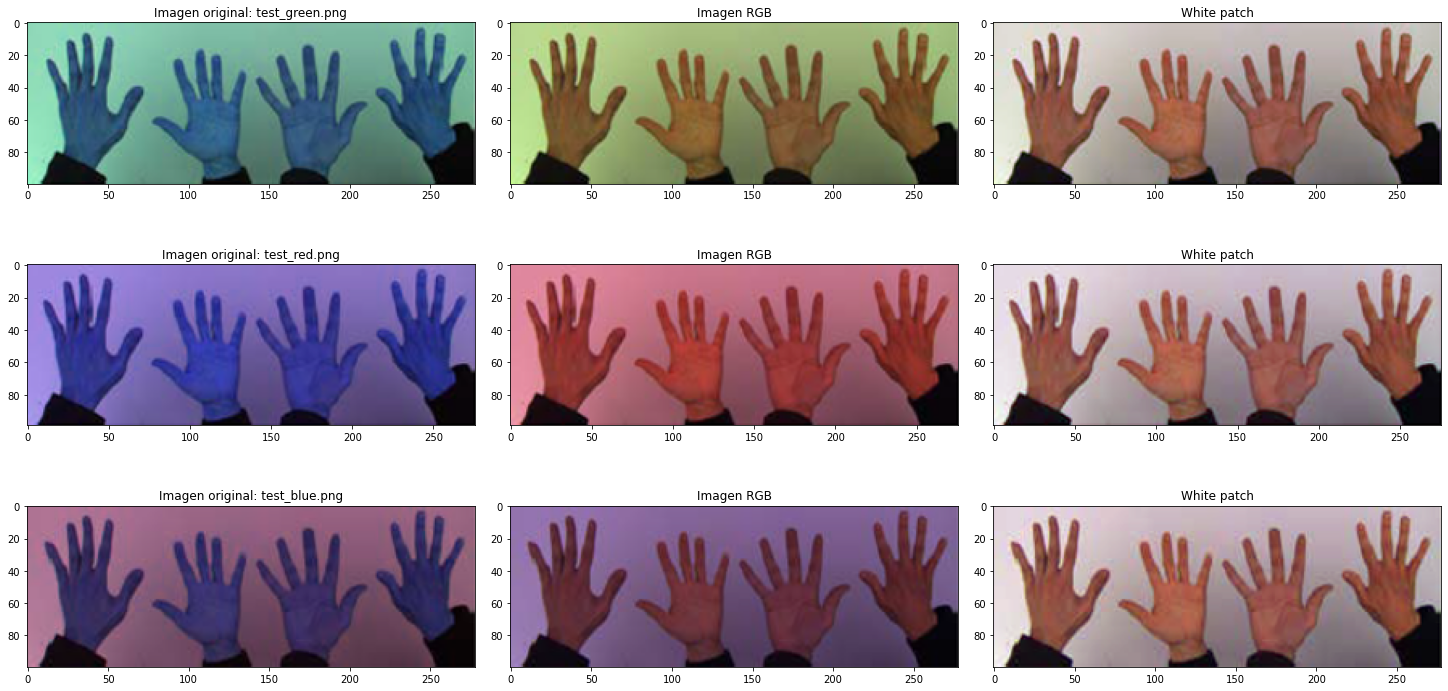

In [43]:
# Ploteo figuras de manos
fig, axs = plt.subplots(len(fileNamesHands), 3, constrained_layout=True, figsize=(20,10))
for i in range(len(fileNamesHands)):

  # Path de cada una de las figuras dentro del directorio
  figurePath = directory+fileNamesHands[i]

  # Obtención de figuras original y RGB
  img, imgRGB = load_figure(figurePath)

  # White patch sobre figura RGB
  imgWP = white_patch(imgRGB)

  # Ploteo de cada set de figuras
  axs[i, 0].imshow(img)
  axs[i, 0].set_title('Imagen original: ' + fileNamesHands[i])
  axs[i, 1].imshow(imgRGB)
  axs[i, 1].set_title('Imagen RGB')
  axs[i, 2].imshow(imgWP)
  axs[i, 2].set_title('White patch')

In [44]:
# Ploteo figuras de Predator
fig, axs = plt.subplots(len(fileNamesPredator), 3, constrained_layout=True, figsize=(15,30))
for i in range(len(fileNamesPredator)):

  # Path de cada una de las figuras dentro del directorio
  figurePath = directory+fileNamesPredator[i]

  # Obtención de figuras original y RGB
  img, imgRGB = load_figure(figurePath)

  # White patch sobre figura RGB
  imgWP = white_patch(imgRGB)

  # Ploteo de cada set de figuras
  axs[i, 0].imshow(img)
  axs[i, 0].set_title('Imagen original: ' + fileNamesPredator[i])
  axs[i, 1].imshow(imgRGB)
  axs[i, 1].set_title('Imagen RGB')
  axs[i, 2].imshow(imgWP)
  axs[i, 2].set_title('White patch')

Output hidden; open in https://colab.research.google.com to view.

## Conclusión

- En el caso de las figuras de manos, el método permitió corregir la imagen y obtener el mismo resultado independientemente del color de la luz empleado, y al mismo tiempo recuperar el color blanco de fondo.

- En el caso de las figuras de Predator, las imagenes finales siempre permitieron revelar mas detalles respecto a la imagen RGB, destacando detalles que resultaban menos evidentes con la iluminación empleada.

El método falla cuando el máximo valor de intensidad en alguno de los canales sea cero (o dos a la vez, o los tres a la vez). Un ejemplo sería el caso de la imagen `'wp_blue.jpg'`, en la que se forzó sucesivamente que uno de los canales sea completamente cero:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen RGB con canal B en cero')

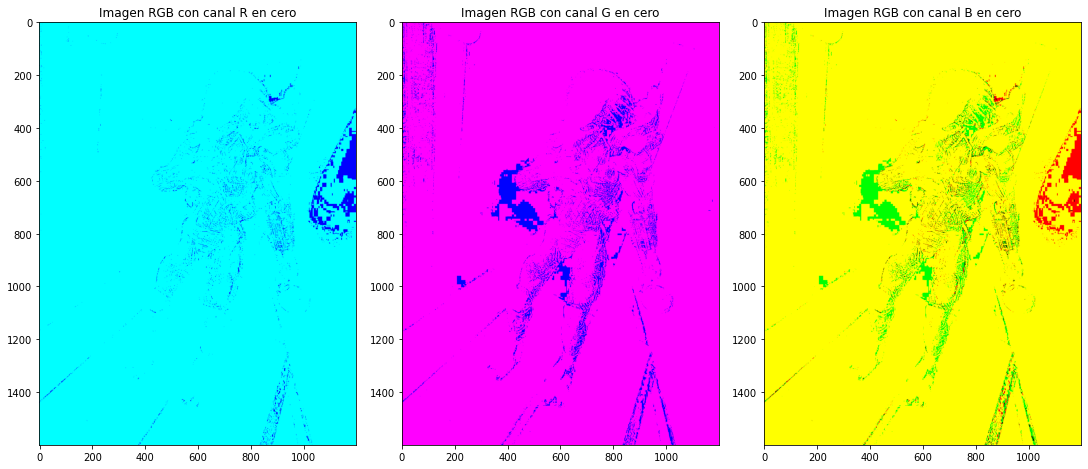

In [53]:
# Cargo imagen 
_, imgRGB = load_figure('./white_patch/wp_blue.jpg')
im_r, im_g, im_b = cv.split(imgRGB)

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15,30))
# Canal R en cero
img = np.zeros(imgRGB.shape)
img[:, :, 1] = im_g
img[:, :, 2] = im_b
axs[0].imshow(img)
axs[0].set_title('Imagen RGB con canal R en cero')
# Canal G en cero
img = np.zeros(imgRGB.shape)
img[:, :, 0] = im_r
img[:, :, 2] = im_b
axs[1].imshow(img)
axs[1].set_title('Imagen RGB con canal G en cero')
# Canal B en cero
img = np.zeros(imgRGB.shape)
img[:, :, 0] = im_r
img[:, :, 1] = im_g
axs[2].imshow(img)
axs[2].set_title('Imagen RGB con canal B en cero')
